In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First let us begin by framing the problem. The task is to identify the fuel consumption of vehicle given its year, make, model and class etc. So this is a multiple regression since the system is using mulitple features to predict the label(Fuel Consumption), and it is also a univariate regression since we are only trying to predict a single value.

In [5]:
PATH = '../data/fuel_train.csv'
data = pd.read_csv(PATH)
print(data.head())


   Year        MAKE         MODEL            VEHICLE CLASS  ENGINE SIZE  \
0  2000  VOLKSWAGEN           GTI                  COMPACT          2.0   
1  2000       DODGE    DAKOTA 4X4  PICKUP TRUCK - STANDARD          4.7   
2  2000         GMC  C1500 SIERRA  PICKUP TRUCK - STANDARD          4.8   
3  2000        FORD      F150 4X4  PICKUP TRUCK - STANDARD          4.6   
4  2000        FORD      F150 4X4  PICKUP TRUCK - STANDARD          4.2   

   CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  COEMISSIONS   
0          4           M5    X              11.2           228  
1          8           M5    X              18.8           382  
2          8           M5    X              18.9           373  
3          8           A4    X              18.5           380  
4          6           A4    X              17.3           359  


It is evident that we need to encode these cateogorical features, and then check for NaN values, use a method to fill them preferably. I will have to make something similar to `SimpleImputer` from `scikit-learn`. It fills the missing values with the mean of the attribute.(If in case NaN values exist)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              511 non-null    int64  
 1   MAKE              511 non-null    object 
 2   MODEL             511 non-null    object 
 3   VEHICLE CLASS     511 non-null    object 
 4   ENGINE SIZE       511 non-null    float64
 5   CYLINDERS         511 non-null    int64  
 6   TRANSMISSION      511 non-null    object 
 7   FUEL              511 non-null    object 
 8   FUEL CONSUMPTION  511 non-null    float64
 9   COEMISSIONS       511 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 40.0+ KB


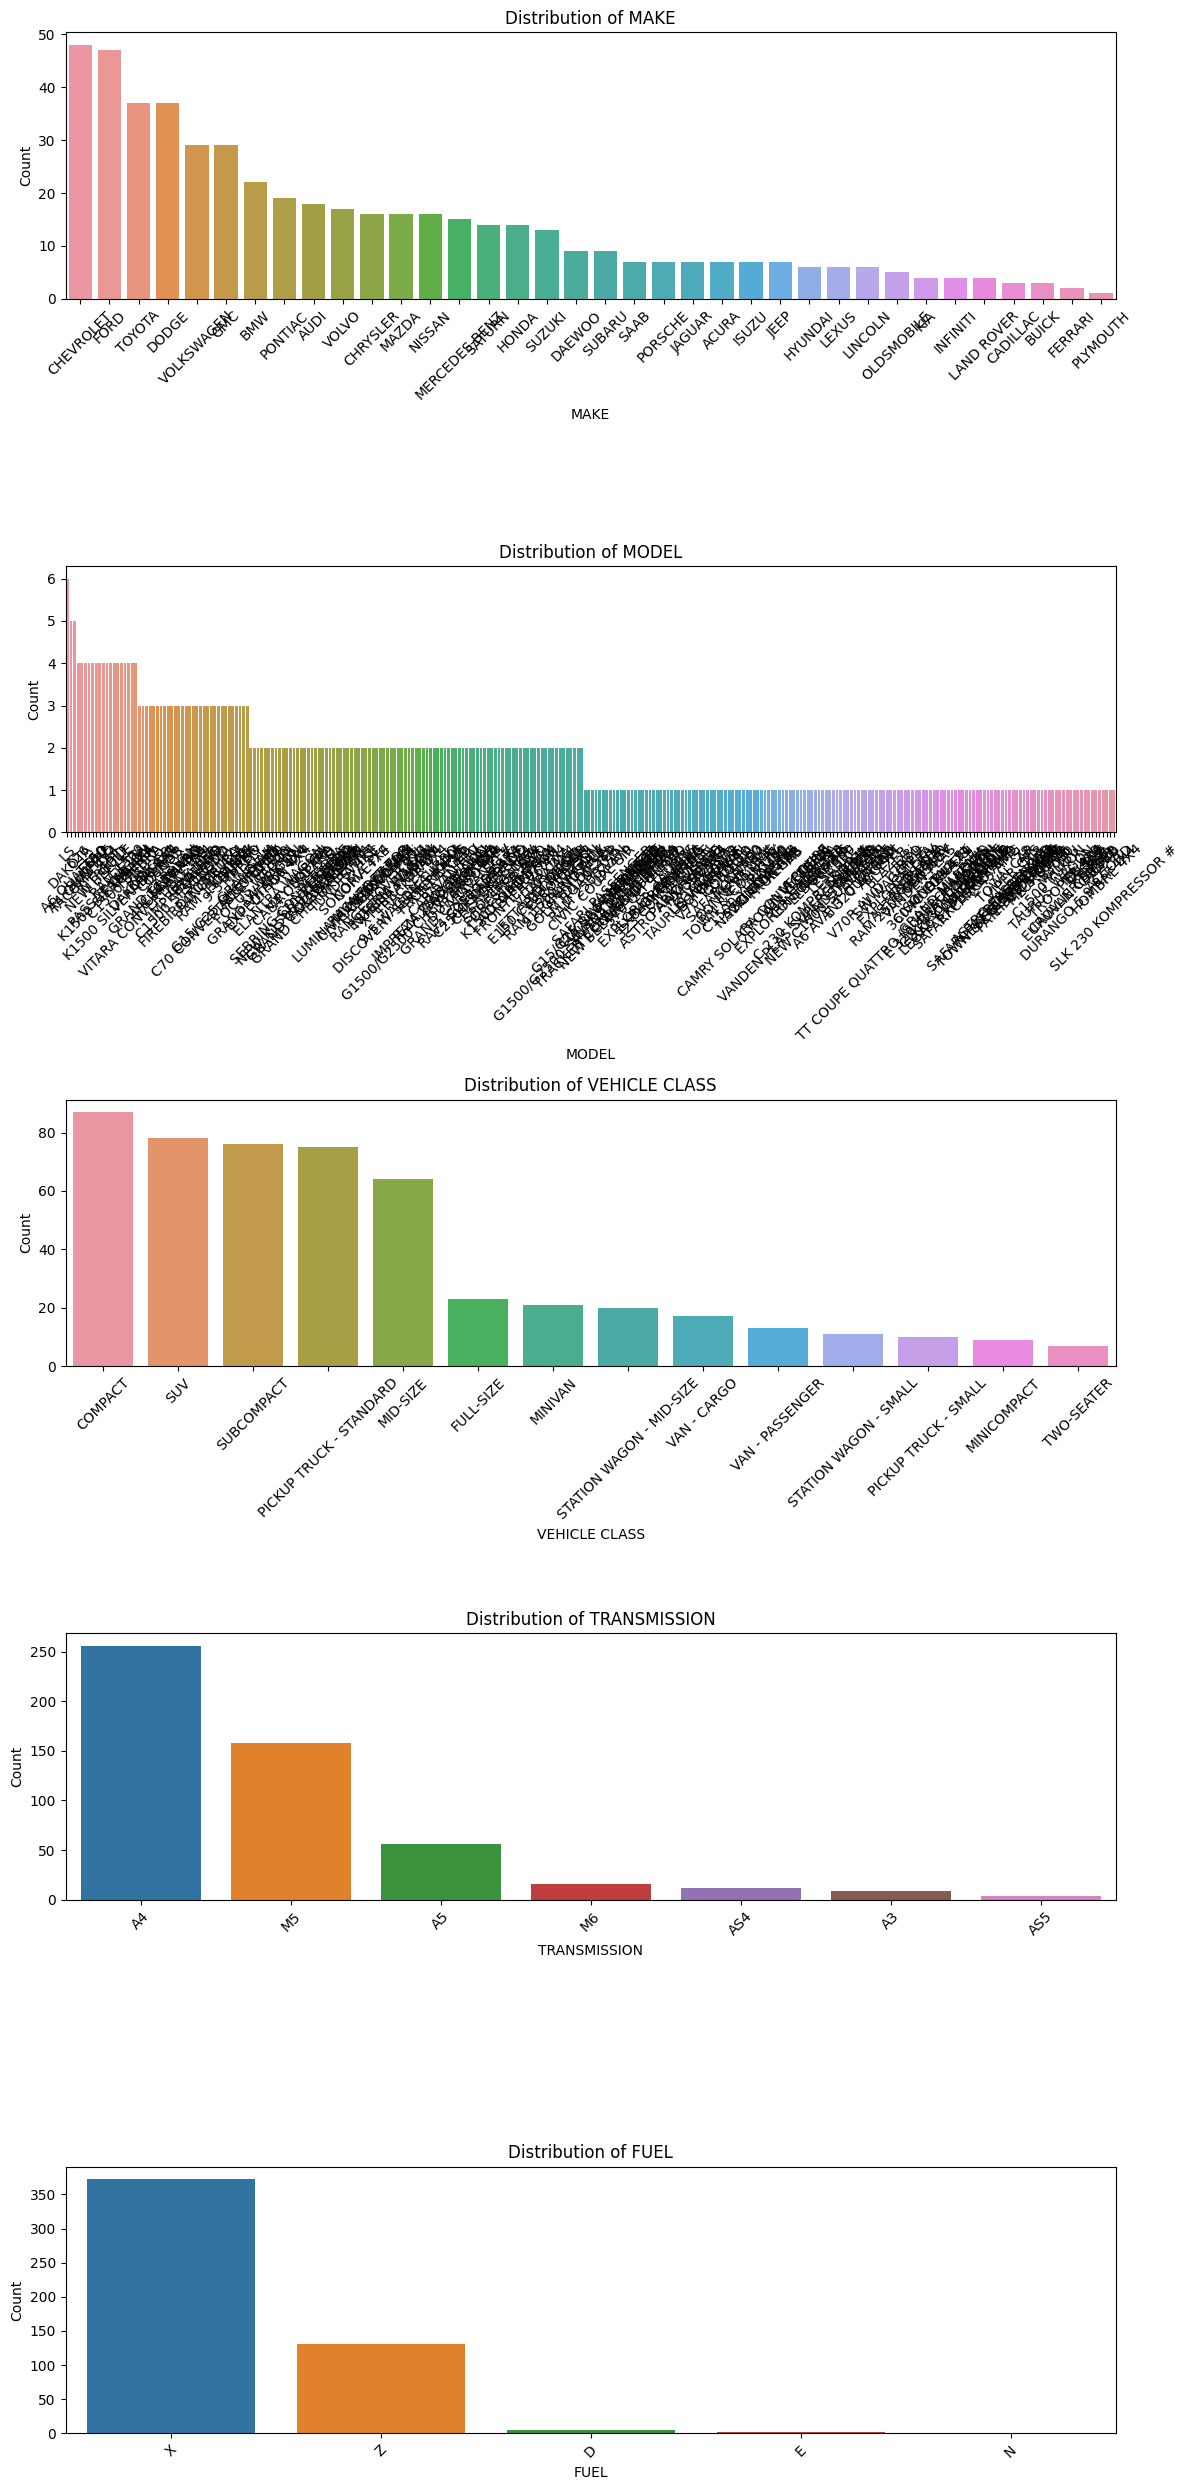

In [14]:
#visualisation for the categorical variables
cat_features = ['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']


fig, axes = plt.subplots(len(cat_features), 1, figsize=(12, 5*len(cat_features)), squeeze=False)

# Plot value counts for each categorical feature
for i, feature in enumerate(cat_features):
    value_counts = data[feature].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i][0])
    axes[i][0].set_title(f'Distribution of {feature}')
    axes[i][0].set_xlabel(feature)
    axes[i][0].set_ylabel('Count')
    axes[i][0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [15]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,511.0,511.000000,511.000000,511.000000,511.000000
mean,2000.0,3.206654,5.726027,14.532485,293.213307
std,0.0,1.194413,1.520864,3.164069,63.158713
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.200000,251.000000
50%,2000.0,3.000000,6.000000,14.200000,283.000000
75%,2000.0,4.000000,6.000000,16.500000,336.000000
max,2000.0,8.000000,12.000000,26.300000,495.000000


One thing to note here is that, 75% of the cars in this data have fuel consumption less than 16.5, 50% of the cars have it less than 14.2. The point being that there is no large difference between the values(the values are not that dispersed)


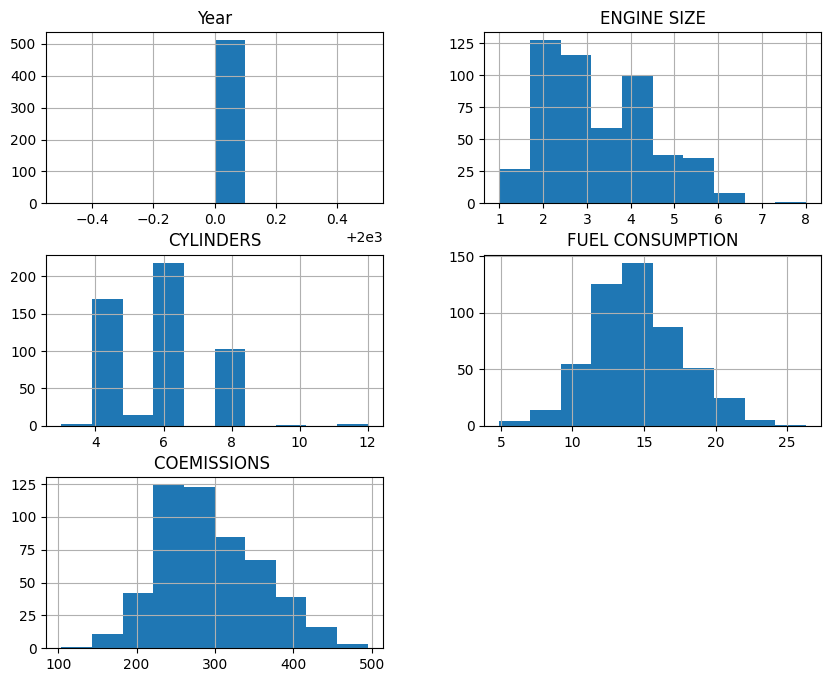

In [16]:
data.hist(figsize=(10, 8))
plt.show()

Most of these features are somewhat normally distributed except some. They are of different scale evidently. There are a few mulitmodal features as well, which we will take care of.Also,  One thing to note is that there are only one value for the year i.e 2000. So I will make the assumption that the test data would also be based on cars of 2000, so that I can remove that feature because it does not really add any good to the task.